In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/age_of_marriage_data.csv")
df

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
...,...,...,...,...,...,...,...,...,...,...
2562,2563,female,"5'3""",Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,"5'11""",Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,"5'3""",Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0
2565,2566,female,"4'11""",NaN,others,Telugu,Not working,Hyderabad,India,26.0


In [3]:
shameer = [['male',5.7,'Muslim','Shaik','Urdu','Software','Madanapalle','India']]

### Problem statement
1. All matrimony sites are available so build a machine learning model to predict when a person get marriage on different parameters such as gender of a person height,religion,caste,language,profession,and country. Based on these parameters we need to figure it out marriage age prediction based on that parameters.
2. Perform analytical approach 
3. collect the data
4. understand the data
5. clean the data
6. prepare the data (feature scaling and feature preprocessing and label emcoding has to be done)
7. apply the machine learning model 
8. save the machine learning model
9. write a flask api to connect front end to backend 
10. deploy to web application.(machine learning ops) (aws google alibaba ibm clouds)

In [4]:
df.info

<bound method DataFrame.info of         id  gender height   religion        caste mother_tongue  \
0        1  female   5'4"        NaN       others        Telugu   
1        2    male   5'7"       Jain   Shwetamber      Gujarati   
2        3    male   5'7"      Hindu      Brahmin         Hindi   
3        4  female   5'0"      Hindu       Thakur         Hindi   
4        5    male   5'5"  Christian   Born Again     Malayalam   
...    ...     ...    ...        ...          ...           ...   
2562  2563  female   5'3"      Hindu       Thakur         Hindi   
2563  2564    male  5'11"      Hindu       Thakur         Hindi   
2564  2565  female   5'3"      Hindu      Baishya       Bengali   
2565  2566  female  4'11"        NaN       others        Telugu   
2566  2567  female   5'2"  Christian     Marthoma     Malayalam   

                            profession               location  \
0                                  NaN                 London   
1     Doctor / Healthcare Profess

In [5]:
df.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


In [6]:
df.isna().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [7]:
import numpy as np
import seaborn as sns
import pandas_profiling as pp

In [8]:
pp.ProfileReport(df)

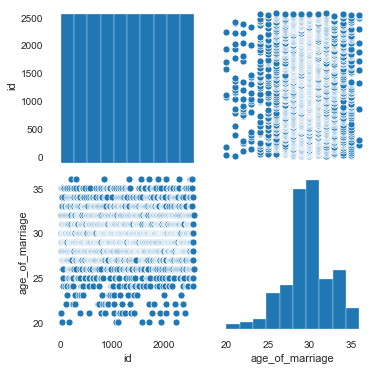

In [9]:
sns.pairplot(df)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

In [12]:
df.dtypes

id                   int64
gender              object
height              object
religion            object
caste               object
mother_tongue       object
profession          object
location            object
country             object
age_of_marriage    float64
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enc = LabelEncoder()
enc

LabelEncoder()

In [85]:
x= df.drop('age_of_marriage',axis=1)

In [86]:
x.ndim

2

In [16]:
y =df['age_of_marriage']

In [17]:
x[['gender','religion', 'caste', 'mother_tongue',
       'profession', 'location', 'country']] = x[['gender','religion', 'caste', 'mother_tongue',
       'profession', 'location', 'country']].apply(enc.fit_transform)

In [18]:
x.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country
1,2,1,"5'7""",2,34,6,22,153,19
2,3,1,"5'7""",1,14,8,25,56,5
3,4,0,"5'0""",1,36,8,7,295,5
4,5,1,"5'5""",0,13,13,68,410,5
5,6,1,"5'5""",1,38,8,74,124,5


In [19]:
x.max()

id               2567
gender              1
height           7'0"
religion            4
caste              40
mother_tongue      26
profession         83
location          460
country            21
dtype: object

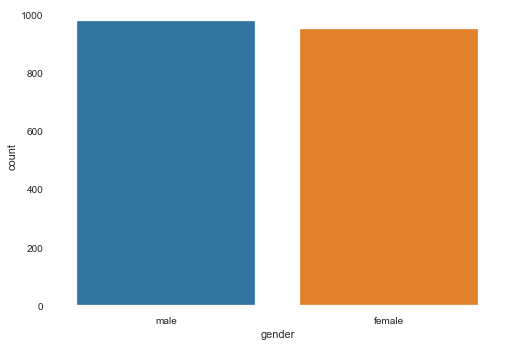

In [20]:
sns.countplot(df.gender)

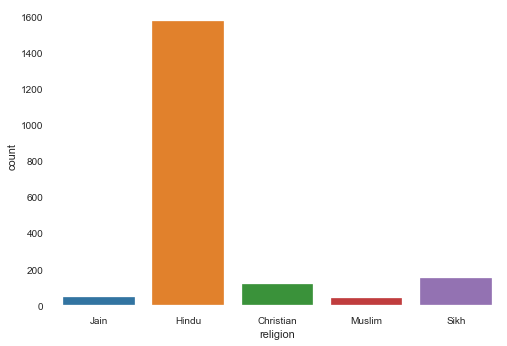

In [21]:
sns.countplot(df.religion)

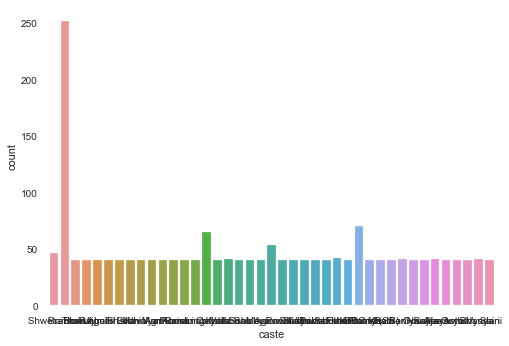

In [22]:
sns.countplot(df.caste)

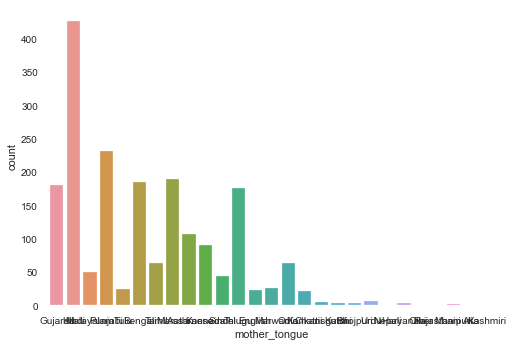

In [23]:
sns.countplot(df.mother_tongue)

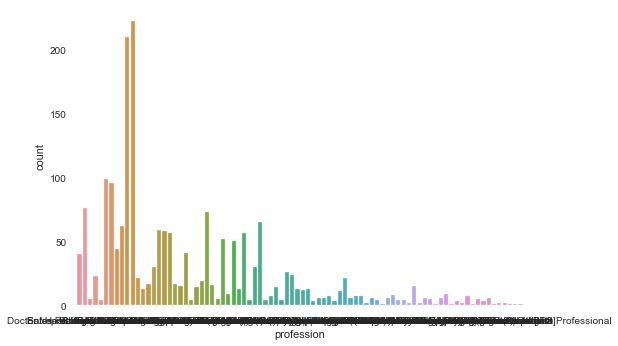

In [24]:
sns.countplot(df.profession)

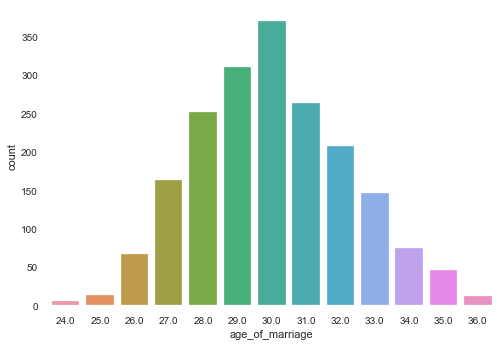

In [25]:
sns.countplot(df.age_of_marriage)

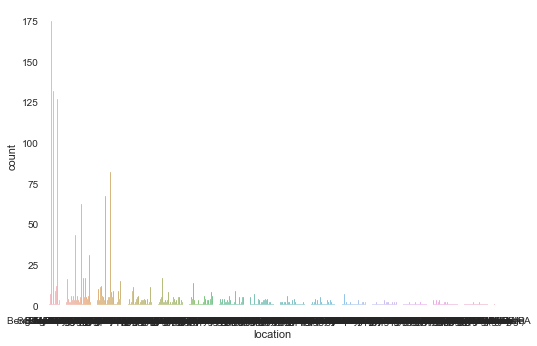

In [26]:
sns.countplot(df.location)

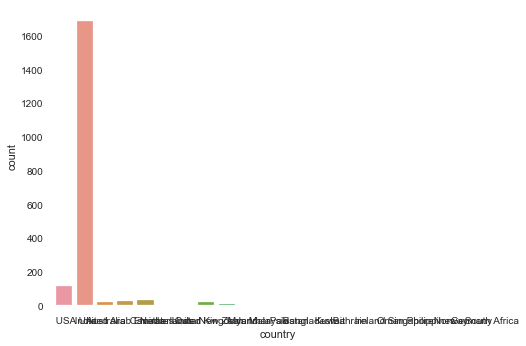

In [27]:
sns.countplot(df.country)

In [28]:
def h_cms(h):
    return int(h.split('\'')[0])*30.48+int(h.split('\'')[1].replace('"',''))*2.54

In [29]:
x['height_cms'] = x.height.apply(h_cms)

In [30]:
x.head(2)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,height_cms
1,2,1,"5'7""",2,34,6,22,153,19,170.18
2,3,1,"5'7""",1,14,8,25,56,5,170.18


In [31]:
x.drop('height', axis=1,inplace=True)

In [32]:
x.head(2)

,id,gender,religion,caste,mother_tongue,profession,location,country,height_cms
1,2,1,2,34,6,22,153,19,170.18
2,3,1,1,14,8,25,56,5,170.18


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1449, 9), (483, 9), (1449,), (483,))

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(max_iter=1000)

In [38]:
lr.fit(x_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr_yhat = lr.predict(x_test)
lr_yhat

array([30., 30., 30., 30., 30., 29., 30., 30., 30., 29., 30., 30., 29.,
       30., 29., 30., 29., 30., 30., 30., 30., 30., 30., 30., 31., 30.,
       29., 31., 30., 30., 30., 29., 30., 29., 30., 33., 30., 29., 29.,
       29., 30., 30., 29., 30., 29., 29., 29., 29., 31., 30., 29., 30.,
       30., 30., 30., 30., 30., 29., 30., 30., 29., 29., 30., 29., 29.,
       30., 30., 29., 30., 30., 29., 30., 29., 31., 31., 30., 30., 29.,
       30., 30., 30., 30., 30., 29., 30., 30., 30., 31., 30., 29., 30.,
       30., 29., 30., 30., 30., 30., 29., 29., 29., 30., 30., 30., 30.,
       29., 30., 29., 30., 30., 29., 30., 29., 30., 30., 29., 31., 30.,
       30., 29., 31., 29., 29., 30., 30., 30., 29., 30., 30., 29., 30.,
       30., 29., 29., 29., 30., 30., 29., 33., 29., 29., 30., 30., 30.,
       30., 30., 29., 30., 31., 29., 30., 30., 31., 29., 31., 30., 29.,
       30., 30., 29., 30., 30., 29., 30., 30., 29., 29., 29., 30., 30.,
       29., 30., 31., 30., 30., 30., 29., 29., 30., 29., 29., 30

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [41]:
cm = confusion_matrix(y_test,lr_yhat)
cm

array([[ 0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6, 13,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 19, 21,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  1, 23, 40,  3,  0,  0,  0,  0],
       [ 1,  0,  0,  1, 23, 30,  8,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 27, 58,  4,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 20, 43,  8,  1,  2,  0,  0],
       [ 0,  0,  0,  0, 10, 34,  4,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10, 22,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 11, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  7,  1,  0,  0,  0,  0]], dtype=int64)

In [42]:
print(classification_report(y_test,lr_yhat))

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         4
        26.0       0.00      0.00      0.00        21
        27.0       1.00      0.02      0.05        42
        28.0       0.50      0.01      0.03        68
        29.0       0.15      0.35      0.21        66
        30.0       0.21      0.64      0.31        90
        31.0       0.25      0.11      0.15        74
        32.0       0.00      0.00      0.00        48
        33.0       0.14      0.03      0.05        34
        34.0       0.00      0.00      0.00        21
        35.0       0.00      0.00      0.00        15

    accuracy                           0.19       483
   macro avg       0.20      0.11      0.07       483
weighted avg       0.26      0.19      0.12       483



c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
accuracy_score(y_test,lr_yhat)

0.19047619047619047

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
knn_yhat = knn.predict(x_test)
knn_yhat

array([30., 29., 28., 28., 27., 30., 32., 26., 30., 29., 30., 29., 28.,
       30., 28., 30., 30., 28., 29., 30., 27., 28., 28., 27., 24., 29.,
       29., 33., 27., 28., 30., 28., 30., 29., 31., 29., 30., 30., 25.,
       30., 27., 30., 27., 32., 27., 27., 27., 30., 25., 30., 29., 27.,
       32., 30., 29., 28., 29., 31., 27., 26., 30., 28., 31., 27., 32.,
       33., 26., 27., 29., 31., 29., 34., 25., 30., 30., 29., 30., 25.,
       27., 27., 33., 30., 28., 28., 29., 29., 29., 31., 30., 30., 27.,
       28., 27., 28., 29., 28., 27., 31., 29., 29., 31., 26., 30., 31.,
       30., 28., 27., 28., 30., 30., 31., 27., 31., 28., 29., 31., 29.,
       29., 27., 28., 31., 30., 29., 32., 30., 34., 28., 27., 27., 29.,
       31., 29., 31., 32., 28., 31., 29., 31., 24., 32., 33., 28., 27.,
       29., 28., 29., 32., 29., 33., 31., 27., 30., 29., 27., 29., 30.,
       28., 28., 33., 27., 31., 30., 30., 30., 27., 33., 26., 29., 26.,
       33., 27., 28., 26., 32., 30., 30., 30., 29., 28., 28., 30

In [48]:
cm=  confusion_matrix(y_test,knn_yhat)
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  3,  5,  3,  1,  5,  0,  1,  1,  0,  0],
       [ 0,  2,  2,  2,  8, 10,  7,  2,  7,  2,  0,  0],
       [ 1,  2,  5,  9, 15, 17, 11,  2,  2,  2,  1,  1],
       [ 0,  0,  4,  8, 12, 18, 13,  6,  1,  3,  1,  0],
       [ 3,  1,  6, 18,  7, 16, 18, 14,  4,  2,  1,  0],
       [ 1,  3,  2,  8, 20, 12, 16,  5,  2,  2,  3,  0],
       [ 0,  1,  4,  9,  8,  8,  9,  3,  3,  2,  1,  0],
       [ 1,  0,  2,  5,  3,  8,  6,  4,  1,  2,  0,  2],
       [ 0,  1,  3,  4,  2,  4,  3,  0,  1,  3,  0,  0],
       [ 0,  0,  1,  0,  2,  2,  6,  3,  1,  0,  0,  0]], dtype=int64)

In [49]:
accuracy_score(y_test,knn_yhat)

0.13664596273291926

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
dtc_yhat = dtc.predict(x_test)
dtc_yhat

array([34., 31., 33., 33., 26., 30., 33., 31., 26., 31., 33., 30., 30.,
       30., 33., 30., 32., 29., 30., 32., 28., 32., 28., 29., 25., 30.,
       33., 28., 29., 32., 29., 27., 30., 32., 29., 30., 33., 31., 31.,
       33., 28., 29., 27., 28., 28., 29., 32., 30., 30., 30., 28., 32.,
       31., 29., 28., 32., 25., 33., 32., 28., 30., 31., 30., 32., 32.,
       27., 30., 32., 32., 29., 27., 29., 33., 31., 31., 28., 27., 30.,
       30., 30., 32., 29., 27., 30., 32., 27., 28., 31., 29., 27., 30.,
       32., 28., 30., 28., 30., 29., 35., 30., 29., 28., 33., 32., 32.,
       30., 33., 28., 28., 32., 29., 30., 26., 30., 32., 32., 34., 29.,
       29., 29., 31., 32., 32., 28., 30., 30., 32., 30., 28., 29., 28.,
       29., 30., 32., 27., 28., 30., 34., 35., 29., 27., 32., 36., 33.,
       31., 32., 28., 31., 29., 34., 32., 28., 28., 27., 30., 29., 33.,
       32., 30., 28., 30., 31., 30., 33., 31., 27., 29., 30., 31., 32.,
       29., 29., 28., 26., 27., 33., 32., 30., 29., 29., 31., 32

In [54]:
cm = confusion_matrix(y_test,dtc_yhat)
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  9,  5,  6,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1, 15,  9,  7,  4,  1,  2,  1,  1,  0,  0],
       [ 0,  0,  1, 11, 18, 18, 15,  3,  1,  1,  0,  0,  0],
       [ 0,  0,  3,  6, 12, 21, 13,  6,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  2, 12, 20, 22, 10, 16,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  7, 10, 18, 16, 13,  9,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  4,  9,  9, 13, 10,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  3, 15,  9,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  3,  4,  7,  5,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  2,  4,  5,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [55]:
accuracy_score(y_test,dtc_yhat)

0.2691511387163561

In [56]:
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,GaussianNB,ComplementNB

In [57]:
c = CategoricalNB()

In [58]:
c.fit(x_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
c_yhat = c.predict(x_test)
c_yhat

IndexError: index 2567 is out of bounds for axis 1 with size 2566

In [60]:
g = GaussianNB()

In [61]:
g.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
g_yhat = g.predict(x_test)
g_yhat

array([36., 27., 34., 36., 36., 27., 36., 33., 27., 28., 27., 27., 31.,
       36., 34., 36., 27., 28., 36., 31., 36., 33., 27., 32., 24., 27.,
       34., 31., 36., 27., 36., 27., 33., 27., 30., 33., 36., 27., 27.,
       34., 27., 31., 27., 31., 27., 34., 29., 27., 36., 36., 32., 30.,
       36., 36., 25., 30., 24., 34., 25., 25., 33., 27., 36., 32., 34.,
       36., 32., 27., 31., 28., 27., 36., 27., 28., 28., 36., 27., 27.,
       31., 31., 36., 36., 27., 27., 28., 27., 25., 33., 30., 27., 31.,
       36., 27., 36., 25., 27., 25., 35., 27., 27., 36., 33., 34., 33.,
       27., 36., 34., 31., 27., 30., 32., 30., 36., 36., 32., 28., 36.,
       27., 27., 28., 33., 29., 36., 36., 36., 33., 33., 28., 27., 36.,
       28., 27., 27., 27., 33., 36., 33., 34., 27., 27., 32., 36., 30.,
       36., 34., 36., 30., 33., 34., 36., 25., 33., 27., 27., 36., 36.,
       36., 27., 30., 27., 34., 27., 36., 31., 27., 36., 33., 31., 31.,
       27., 36., 28., 25., 27., 36., 27., 33., 27., 34., 27., 31

In [63]:
cm = confusion_matrix(y_test,g_yhat)
cm

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  7,  0,  6,  0,  0,  3,  0,  1,  0,  0,  0,  3],
       [ 0,  5,  0, 22,  1,  0,  1,  2,  2,  1,  1,  0,  7],
       [ 0,  4,  0, 32,  3,  0,  1,  3,  1,  2,  1,  1, 20],
       [ 0,  6,  1, 22,  2,  0,  3,  6,  1,  2,  9,  0, 14],
       [ 0,  3,  1, 26,  3,  1,  5, 10,  1,  7,  8,  0, 25],
       [ 0,  1,  1, 14,  7,  1,  7, 14,  0,  8,  7,  1, 13],
       [ 0,  0,  0,  7,  1,  1,  5,  3,  3,  9,  4,  0, 15],
       [ 0,  1,  0,  2,  0,  0,  0,  4,  4,  7,  4,  0, 12],
       [ 0,  0,  0,  4,  0,  2,  3,  0,  1,  2,  4,  1,  4],
       [ 0,  0,  0,  0,  1,  3,  1,  0,  0,  4,  2,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [64]:
accuracy_score(y_test,g_yhat)

0.12422360248447205

In [65]:
b = BernoulliNB()

In [66]:
b.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [67]:
b_yhat = b.predict(x_test)

In [68]:
cm = confusion_matrix(y_test,b_yhat)

In [69]:
accuracy_score(y_test,b_yhat)

0.20082815734989648

In [70]:
cn = ComplementNB()

In [71]:
cn.fit(x_train,y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [72]:
cn_yhat = cn.predict(x_test)

In [73]:
cm = confusion_matrix(y_test,cn_yhat)

In [74]:
accuracy_score(y_test,cn_yhat)

0.13457556935817805

## Random forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
model = RandomForestRegressor(n_estimators=80,max_depth=11)
model.fit(x_train,y_train)
y_predict= model.predict(x_test)

### Model evaluation

In [77]:
from sklearn.metrics import mean_absolute_error,r2_score

In [78]:
print("MAE",mean_absolute_error(y_test,y_predict))
r2_score(y_test,y_predict)

MAE 1.0666677256719554


0.6794017241829221

In [80]:
import joblib

In [81]:
joblib.dump(model,"Random_forest_marriage_prediction_model.ml")

['Random_forest_marriage_prediction_model.ml']

In [83]:
x.ndim

2

In [84]:
y.ndim

1

In [90]:
def predict():
    int_features = [int(x) for x in request.form.values()]
    print(int_features)
    final = np.array([[int_features]])
    print(final)

In [104]:
import request
predict()

ModuleNotFoundError: No module named 'request'